<a href="https://colab.research.google.com/github/LisamShoe/Heart-Disease-Kaggle-Project/blob/master/Heart_Disease_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for the Heart Disease Kaggle Set
Requirements: notebook should address each of the following:
- Data issues: missing values, duplicate values, outliers
- Data cleaning solutions: imputation/estimation, dropping entries -- justify your choices!
- Describe the realtionship of features to your target (should include at least a few plots).
- Feature engineering (transformation, normalization, createing new combinations of features, etc), if you think this is necessary. Describe your rationale.

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import Data Set
df = pd.read_csv("https://raw.githubusercontent.com/LisamShoe/Heart-Disease-Kaggle-Project/master/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data issues: missing values, duplicate values, outliers

In [3]:
#check ful null values
df.isnull().values.any()

False

The above cell says that there are no NaNs, but another researcher found out: data #93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed) data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

For our purposes, I will assume that the data given to me is correct, but if I wanted to be more thorough I would correct this

In [4]:
#Are there any duplicates? If No, it should only return with False
df.duplicated().unique()

array([False,  True])

In [5]:
#Where are the duplicates?
df[df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


There is only one duplicate line and we aren't given identifying information like a patient number, so we will assume that this is not a true duplicate for our purposes and leave it in.

Now lets look for outliers:

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- Age: Min is 29 and Max is 77, those are normal ages
- Sex: only the 2 options are given, but we see that it leans more heavily to male in the mean
- trestbps: Means resting blood pressure, from a google search 120 is "optimal", 90 is "low" so our values of 94 to 200 sound ok, but **above 180** is "contact your doctor immediately"
- cholesterol: min is 126 and max is 564, but 75% is 274.5 and a google search for cholesterol shows above 239 is high and below 200 is optimal. **That 564 is looking like an outlier.**
- fbs: for fasting blood sugar the options are 0 and 1 with 1 being "high" and likely diabetic
- restecg: this is actually categorical data and not numeric with values as "0", "1", and "2"
- thalach: somehow this means max heart rate. "resting" heart rate is 60-100 and max is around 200 for a 20 year old. Numbers between 60 and 200 are generally ok, so might **double check the top 25%**
- exang: Exercised induced angina, this is categorical with 1=yes and 0=no
- oldpeak: refers to ST depression, which refers to a finding on an electrocardiogram.
- slope: values are 0, 1, and 2, this looks ok
- ca: this is "major vessels", with so few being "4" I want to look and see if **"4"** only refers to the filled in NaNs
- thal: my info says that this should be numbers 1, 2, and 7, but 7 doesn't show up so I think it is 0, 1, 2, and 3. I'm not sure how to fix that and would probably ask the source of the data.
- target: options are "0" (has it) and "1" (does not) and it looks like a little less than half of our data points have it.


In [7]:
df[df['trestbps'] >= 180]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [8]:
#yes, 4 is only assigned to the NaN found earlier. These are all males and our dataset is more heavily weighted towards males, so I would be inclined to drop these rows. 
#If gender was more evenly distributed in the data set, I would possibly choose a different way of estimating these values
df[df['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [9]:
#Result: 564 is very high and I believe it to be a typo. I would double check with the source of the data, but otherwise might drop this row.
df[df['chol'] > 350]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [10]:
#Result: The max heart rates from the tests are higher than I would expect overall. The 202 belongs to a 29 year old, so that makes sense as max heart rate is higher with younger age.
df[df['thalach'] > 171]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1


# Data Cleaning
Let's go ahead and drop the rows with the outliers. I chose eliminating these rows because I feel that we have enough representation of datapoints that dropping 6 rows is ok. Another option may be to fill these with average data or use decision trees to populate the missing data. 

In [11]:
# Index values of rows to drop: 85, 92, 158, 163, 164, 251
df.drop([85, 92, 158, 163, 164, 251], axis=0, inplace=True)

In [12]:
#lets see those max and mins again
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.468013,0.680135,0.956229,131.636364,245.838384,0.148148,0.525253,149.430976,0.329966,1.053535,1.397306,0.676768,2.309764,0.538721
std,9.016491,0.467211,1.033936,17.672769,48.591730,0.355846,0.526528,23.014452,0.470994,1.165696,0.618187,0.938965,0.613755,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


# I don't know a whole lot about medical stuff, so let's make it human-readable


In [13]:
#save the data set to a new variable before transforming them and use the more descriptive column names
num_df = df.rename(columns={"cp": "chest pain", "trestbps": "resting blood pressure", "chol":"cholesterol", "fbs":"fasting blood sugar", "thalach":"max heart rate", "exang":"exercise angina", "ca":"major vessels"})
#assign male and female
sex_dict = {0: "female", 1:"male"}
df["sex"] = df["sex"].map(sex_dict)
#chest pain categories
cp_dict = {0: "asymptomatic", 1:"atypical angina", 2:"non-anginal pain", 3:"typical angina"}
df["cp"] = df["cp"].map(cp_dict)
#rest ecg categories
restecg_dict = {0: "left ventricular hypertrophy", 1:"normal", 2:"ST-T wave abnormality"}
df["restecg"] = df["restecg"].map(restecg_dict)
#target
target_dict = {0: "disease", 1:"no disease"}
df["target"] = df["target"].map(target_dict)

#I'm leaving Fasting Blood Sugar but 0 is low and 1 is high meaning 1 is prediabetic or diabetic
df = df.rename(columns={"cp": "chest pain", "trestbps": "resting blood pressure", "chol":"cholesterol", "fbs":"fasting blood sugar", "thalach":"max heart rate", "exang":"exercise angina", "ca":"major vessels"})

df

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,major vessels,thal,target
0,63,male,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,0,0,1,no disease
1,37,male,non-anginal pain,130,250,0,normal,187,0,3.5,0,0,2,no disease
2,41,female,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,2,0,2,no disease
3,56,male,atypical angina,120,236,0,normal,178,0,0.8,2,0,2,no disease
4,57,female,asymptomatic,120,354,0,normal,163,1,0.6,2,0,2,no disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,asymptomatic,140,241,0,normal,123,1,0.2,1,0,3,disease
299,45,male,typical angina,110,264,0,normal,132,0,1.2,1,0,3,disease
300,68,male,asymptomatic,144,193,1,normal,141,0,3.4,1,2,3,disease
301,57,male,asymptomatic,130,131,0,normal,115,1,1.2,1,1,3,disease


Which of my data is categorical and which is numeric?

This will determine what kinds of graphs I should use

Categorical:
- sex
- chest pain
- restecg
- exercise angina

Numeric:
- Age
- Resting Blood Pressure
- cholesterol
- max heart rate
- oldpeak

Kind of both:
- fasting blood sugar
- slope
- major vessels
- thal

# Realtionship of features to your target
We will look at a few overall plots and then drill down.

In [14]:
#we can look at correlation, but it only pulls the numerical data, not the categorical. So we will use the numeric version over the readable

num_df.corr()

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,major vessels,thal,target
age,1.000000,-0.083035,-0.065925,0.294691,0.185768,0.132048,-0.108174,-0.397342,0.100344,0.198148,-0.158937,0.369487,0.061014,-0.229524
sex,-0.083035,1.000000,-0.050062,-0.063643,-0.173565,0.042146,-0.070053,-0.047775,0.143497,0.109087,-0.038084,0.086967,0.217105,-0.287036
chest pain,-0.065925,-0.050062,1.000000,0.047752,-0.094081,0.109508,0.036169,0.287586,-0.386488,-0.146330,0.111870,-0.223416,-0.159570,0.425358
resting blood pressure,0.294691,-0.063643,0.047752,1.000000,0.157286,0.179427,-0.120636,-0.049409,0.067633,0.198999,-0.128978,0.100795,0.069598,-0.145789
cholesterol,0.185768,-0.173565,-0.094081,0.157286,1.000000,0.017997,-0.130037,-0.009804,0.078803,0.036726,0.019915,0.146571,0.078601,-0.100687
fasting blood sugar,0.132048,0.042146,0.109508,0.179427,0.017997,1.000000,-0.074128,-0.002047,0.009705,0.008506,-0.053468,0.143802,-0.040677,-0.013379
restecg,-0.108174,-0.070053,0.036169,-0.120636,-0.130037,-0.074128,1.000000,0.037294,-0.060959,-0.050923,0.083244,-0.113269,-0.003379,0.127977
max heart rate,-0.397342,-0.047775,0.287586,-0.049409,-0.009804,-0.002047,0.037294,1.000000,-0.375010,-0.341322,0.381868,-0.262586,-0.092476,0.417164
exercise angina,0.100344,0.143497,-0.386488,0.067633,0.078803,0.009705,-0.060959,-0.375010,1.000000,0.289534,-0.254525,0.142674,0.206192,-0.427991
oldpeak,0.198148,0.109087,-0.146330,0.198999,0.036726,0.008506,-0.050923,-0.341322,0.289534,1.000000,-0.578132,0.295813,0.211900,-0.431618


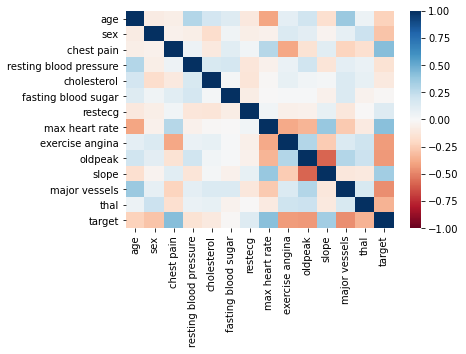

In [15]:
sns.heatmap(num_df.corr(), vmin=-1, vmax=1, cmap = 'RdBu')
plt.show()

## Lets see an overview comparison large scale colored by if the patient has the disease

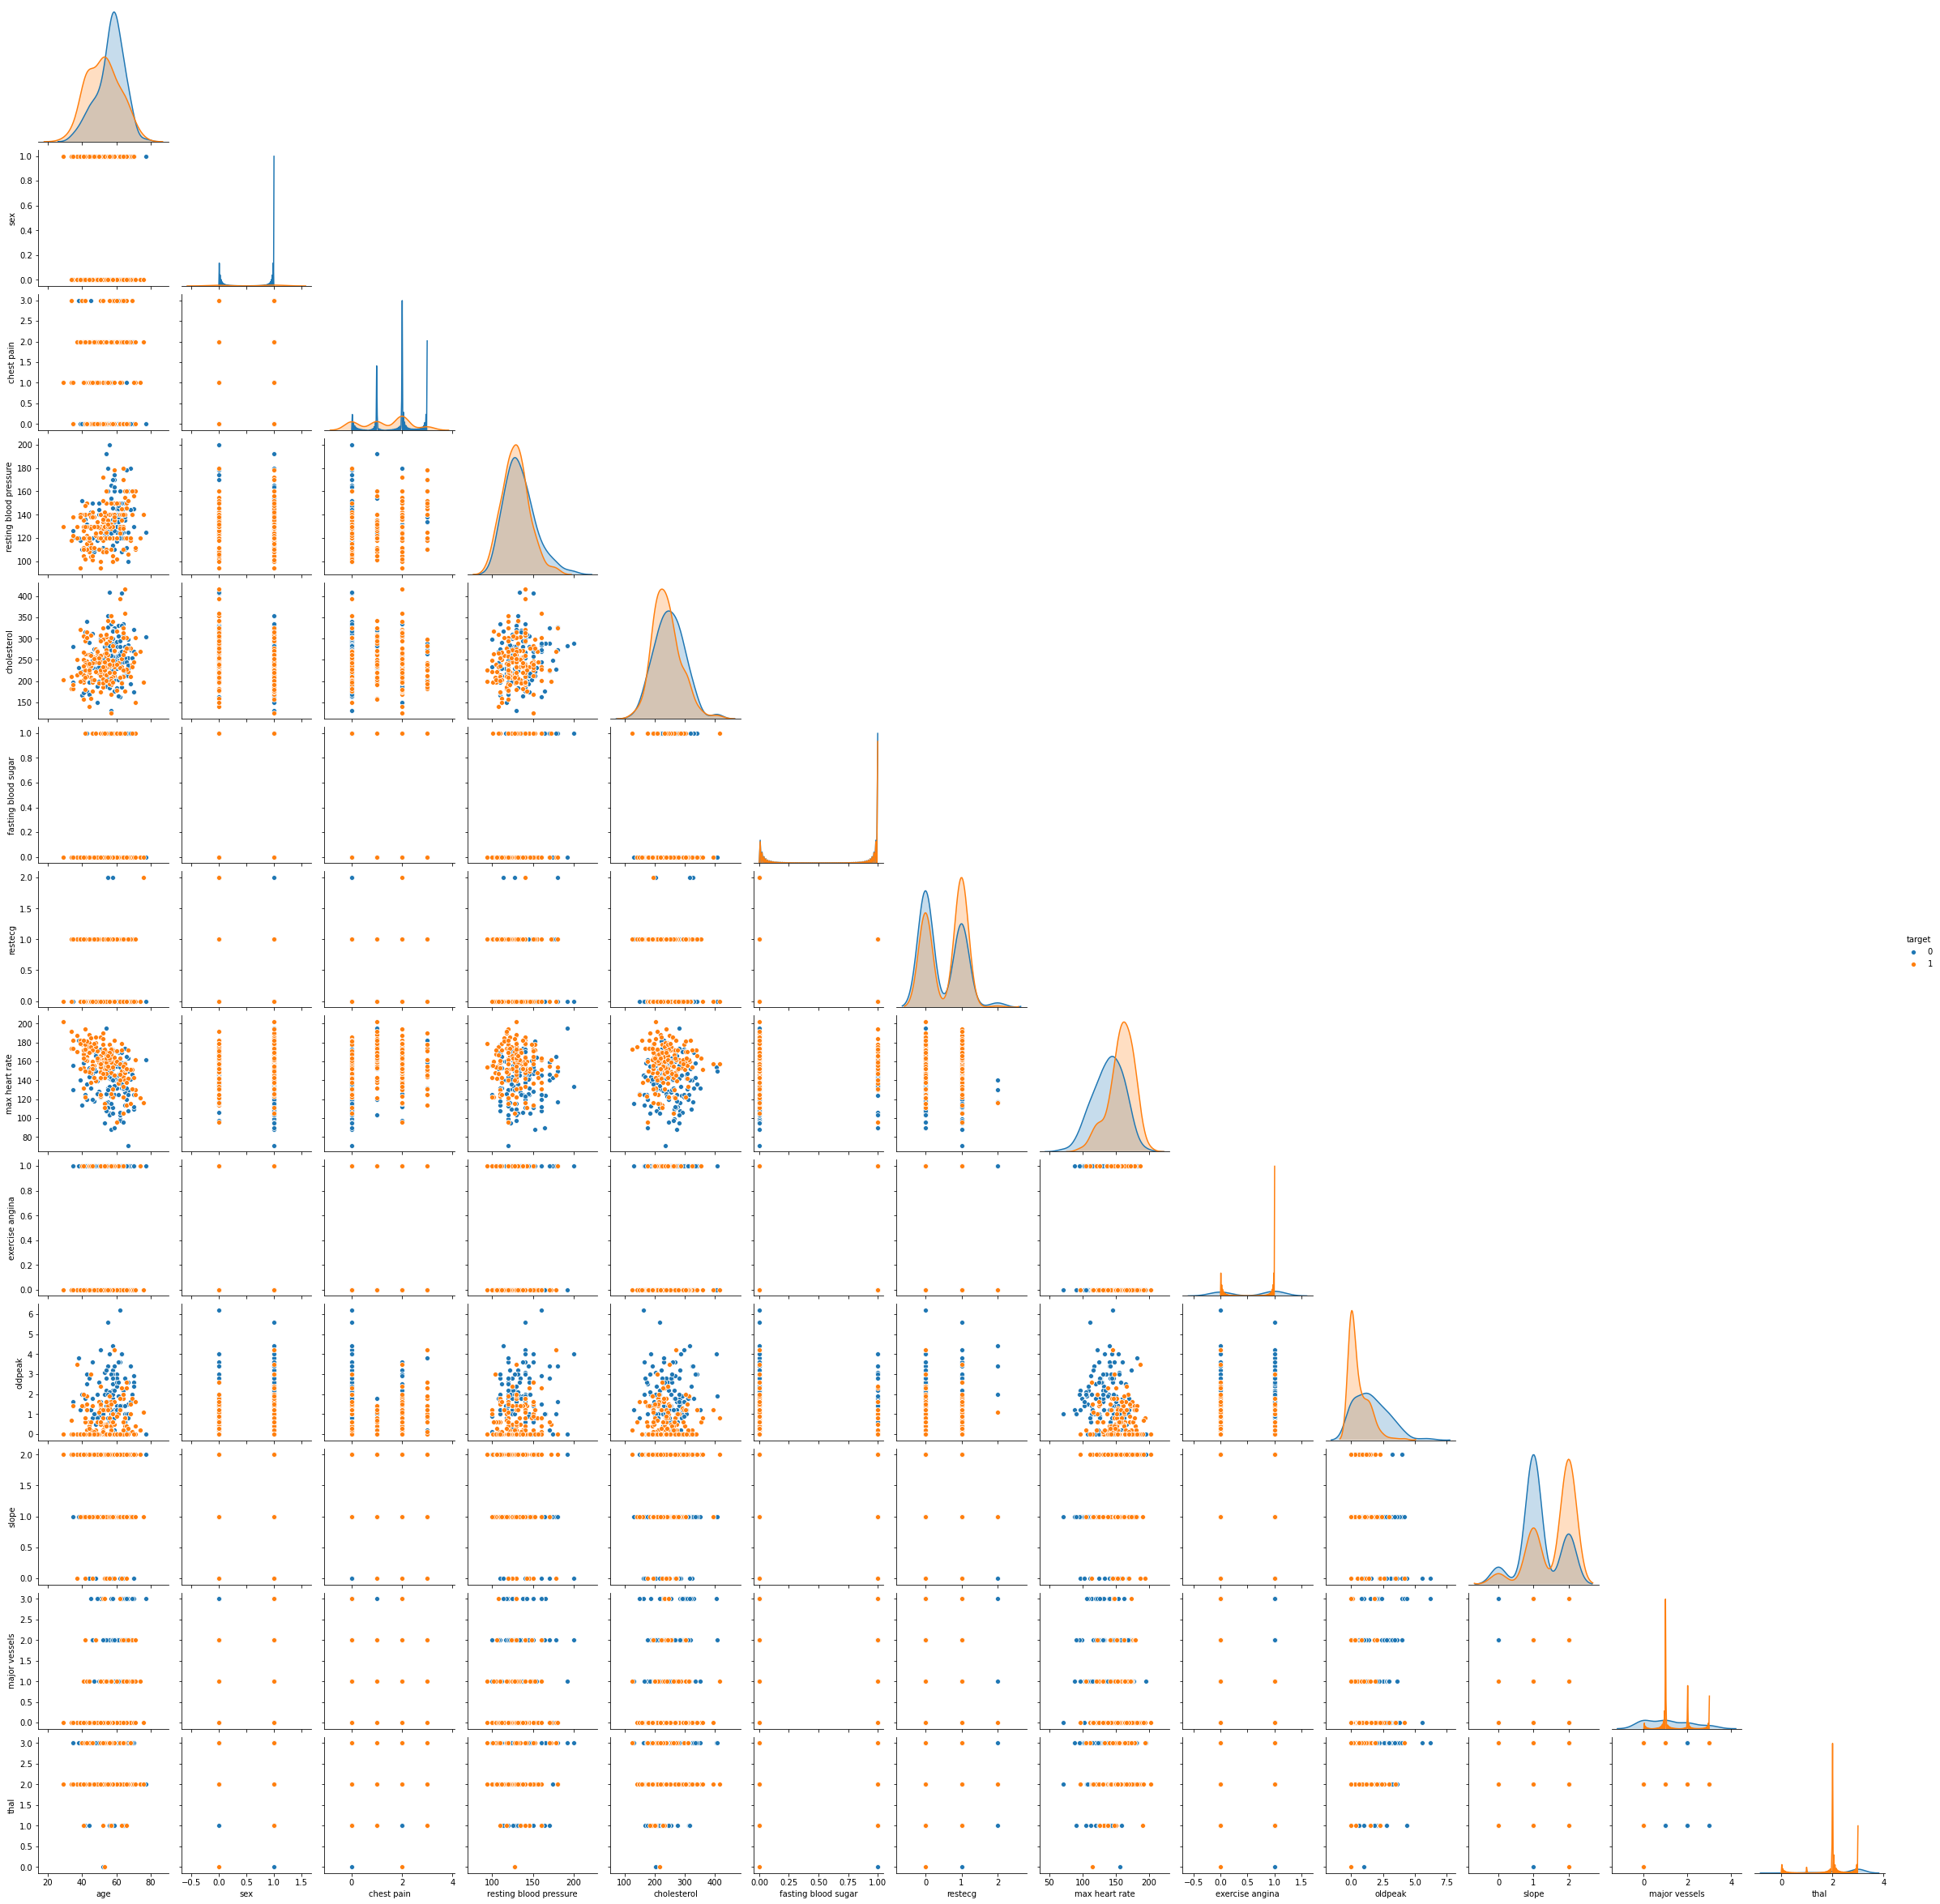

In [16]:
#Lets see an overview comparison large scale colored by if the patient has the disease
sns.pairplot(num_df, corner = "true", hue="target")
plt.show()

## That's a lot of data! Lets look at it a little more zoomed in.

### Age

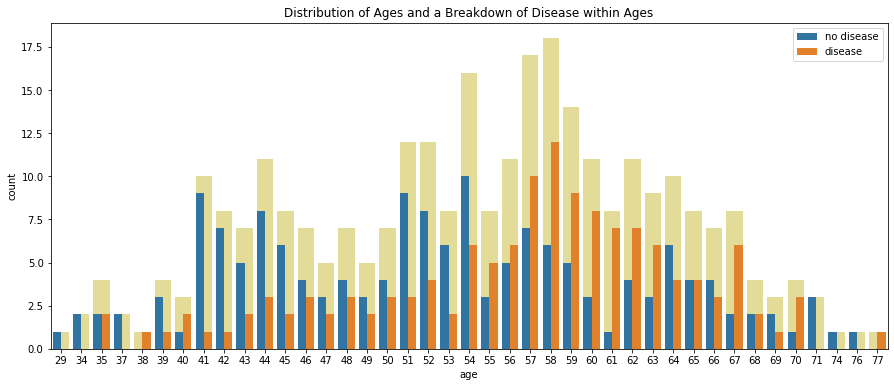

In [17]:
#Age
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x="age", data=df, color='khaki')
#plt.show()
#f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x="age", hue="target", data=df)
ax.legend(loc='upper right')
plt.title('Distribution of Ages and a Breakdown of Disease within Ages')
plt.show()

### Sex

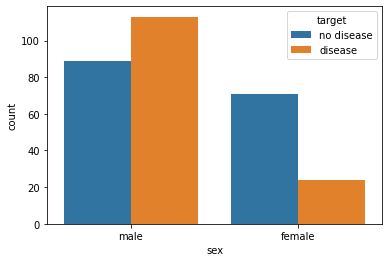

In [18]:
#Sex
sns.countplot(x="sex", hue="target", data=df)
plt.show()

It appears that our sample set is skewed towards men having it. If we are trying to predict a general population it might make sense to say "If you are male you are more likely to have it", but this data may not be representative if we are trying to predict if a particular person is likely to have heart disease. If we are predicting if a specific person has heart disease, we may want to build separate models for men and women.

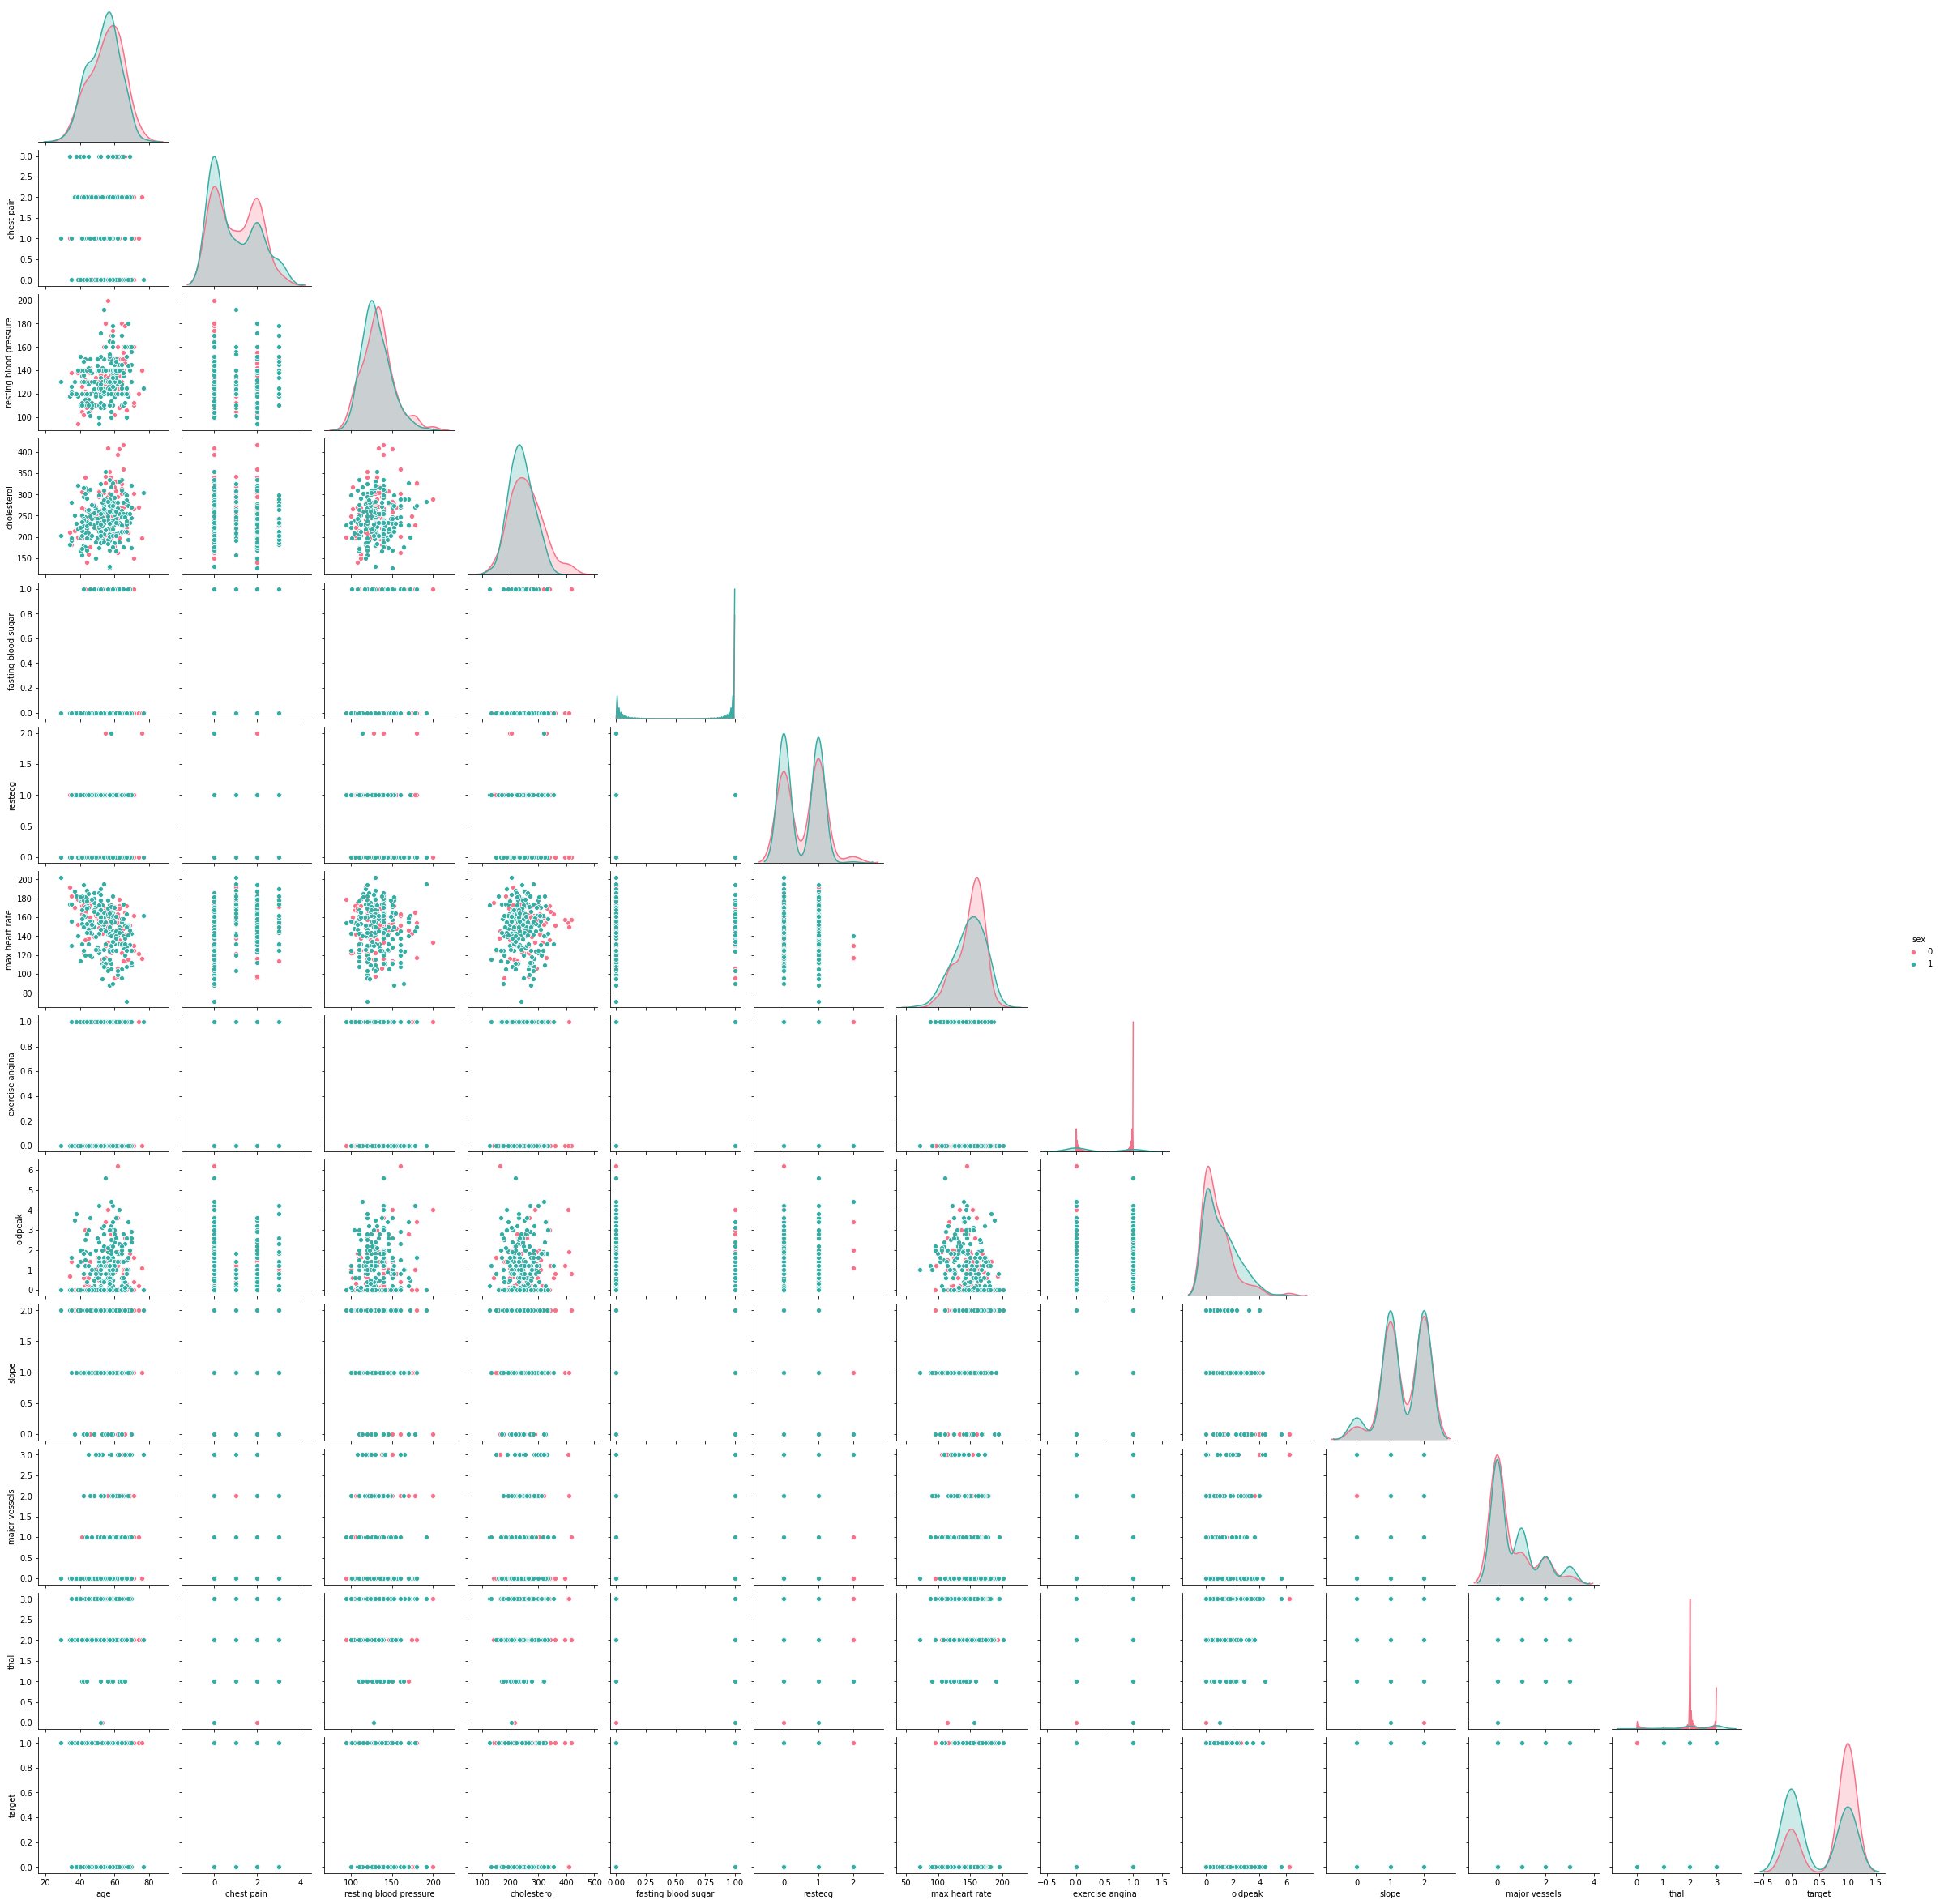

In [19]:
sns.pairplot(num_df, hue="sex", corner = "true", palette="husl")
plt.show()

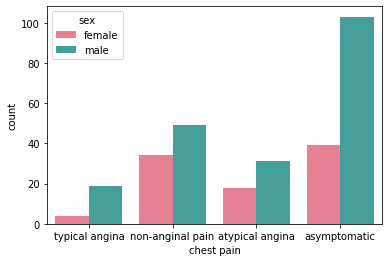

In [20]:
#Sex & Chest Pain
sns.countplot(x="chest pain", hue="sex", hue_order=("female", "male"), data=df, palette="husl")
plt.show()

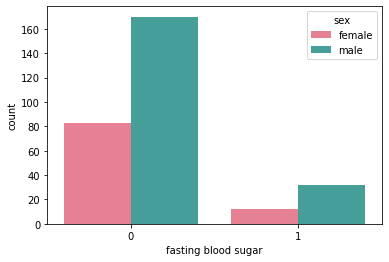

In [21]:
#Sex & Fasting Blood sugar
sns.countplot(x="fasting blood sugar", hue="sex", hue_order=("female", "male"), data=df, palette="husl")
plt.show()

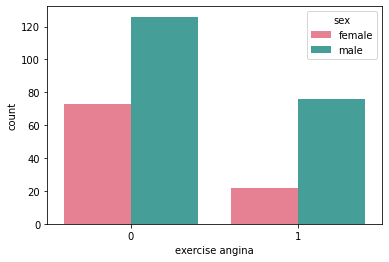

In [22]:
#Sex & Exercise Angina
sns.countplot(x="exercise angina", hue="sex", hue_order=("female", "male"), data=df, palette="husl")
plt.show()

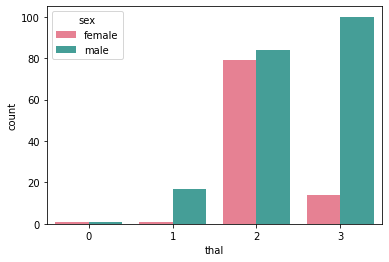

In [23]:
#Sex & Thal
sns.countplot(x="thal", hue="sex", hue_order=("female", "male"), data=df, palette="husl")
plt.show()

### Chest Pain

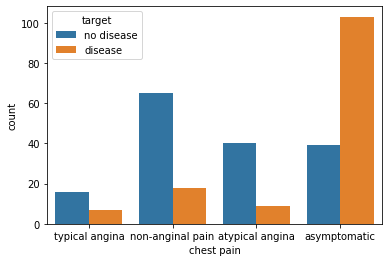

In [24]:
#ChestPain
sns.countplot(x="chest pain", hue="target", data=df)
plt.show()

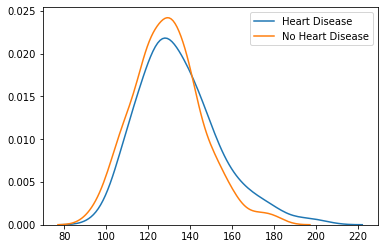

In [25]:
#Resting Blood Pressure
sns.kdeplot(df.loc[df['target'] == 'disease', 'resting blood pressure'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 'no disease', 'resting blood pressure'], label = 'No Heart Disease')
plt.show()

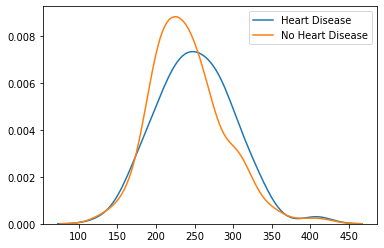

In [26]:
#cholesterol
sns.kdeplot(df.loc[df['target'] == 'disease', 'cholesterol'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 'no disease', 'cholesterol'], label = 'No Heart Disease')
plt.show()

### Fasting blood sugar aka likelihood of diabetes

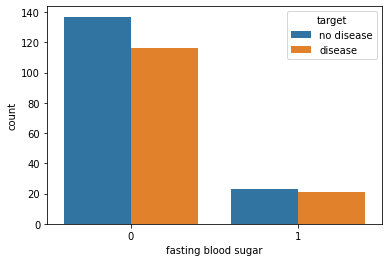

In [27]:
#fasting blood sugar aka likelihood of diabetes
sns.countplot(x="fasting blood sugar", hue="target", data=df)
plt.show()

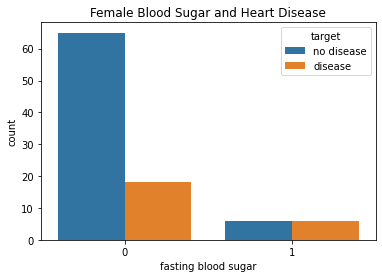

In [28]:
#This data looks insignificant, is there any diffence when sex is involved?
sns.countplot(x=df.loc[df['sex'] == 'female', 'fasting blood sugar'], hue="target", data=df)
plt.title('Female Blood Sugar and Heart Disease')
plt.show()

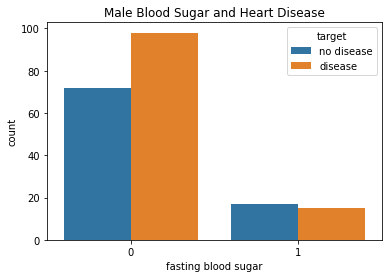

In [29]:
sns.countplot(x=df.loc[df['sex'] == 'male', 'fasting blood sugar'], hue="target", data=df)
plt.title('Male Blood Sugar and Heart Disease')
plt.show()

In [30]:
#how many diabetics do we have? is it over 30? Is this a statistically significant measure?
df[df['fasting blood sugar'] == 1].count()

age                       44
sex                       44
chest pain                44
resting blood pressure    44
cholesterol               44
fasting blood sugar       44
restecg                   44
max heart rate            44
exercise angina           44
oldpeak                   44
slope                     44
major vessels             44
thal                      44
target                    44
dtype: int64

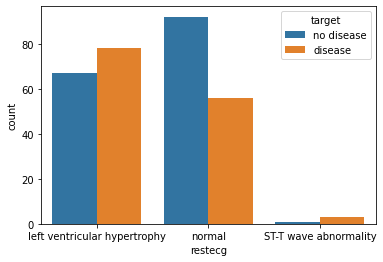

In [31]:
#rest ecg
sns.countplot(x="restecg", hue="target", data=df)
plt.show()

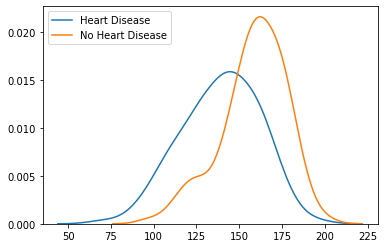

In [32]:
#max heart rate
sns.kdeplot(df.loc[df['target'] == 'disease', 'max heart rate'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 'no disease', 'max heart rate'], label = 'No Heart Disease')
plt.show()

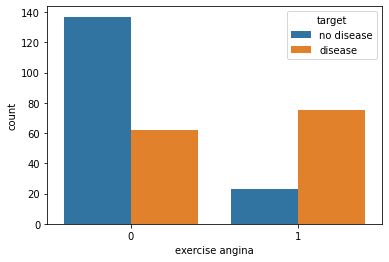

In [33]:
#exercise angina
sns.countplot(x="exercise angina", hue="target", data=df)
plt.show()

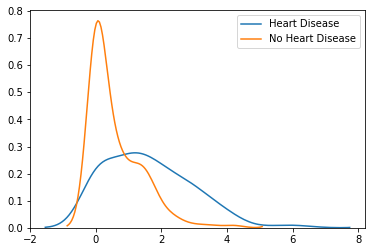

In [34]:
#oldpeak
sns.kdeplot(df.loc[df['target'] == 'disease', 'oldpeak'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 'no disease', 'oldpeak'], label = 'No Heart Disease')
plt.show()

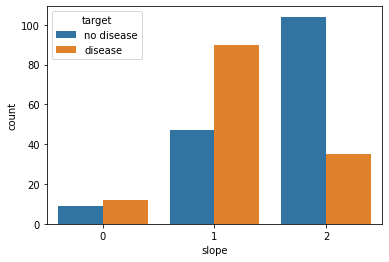

In [35]:
#slope
sns.countplot(x="slope", hue="target", data=df)
plt.show()

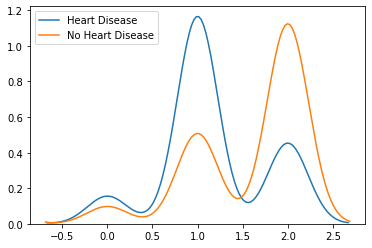

In [36]:
sns.kdeplot(df.loc[df['target'] == 'disease', 'slope'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 'no disease', 'slope'], label = 'No Heart Disease')
plt.show()

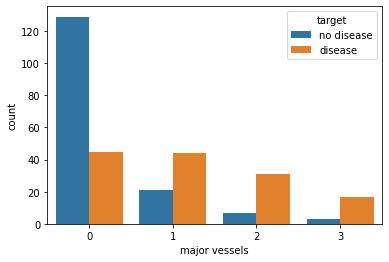

In [37]:
#major vessels
sns.countplot(x="major vessels", hue="target", data=df)
plt.show()

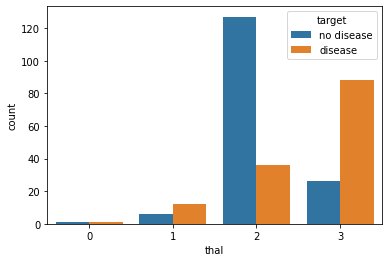

In [38]:
#thal test
sns.countplot(x="thal", hue="target", data=df)
plt.show()

## Feature Engineering
 I'd like to explore more by simplifying some features to split them to see if there is a spot where we see more difference in a few of the features above

In [39]:
eng_df = df
#group together neutral and negative slope, separate for positive slope
eng_df['eng_slope'] = eng_df['slope'].map({0: "neutral", 1:"neutral", 2:"pos"})
#separate 0 vessels from any vessels
eng_df['eng_vessels'] = eng_df['major vessels'].map({0: "none", 1:"pos", 2:"pos", 3:"pos"})
eng_df

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,restecg,max heart rate,exercise angina,oldpeak,slope,major vessels,thal,target,eng_slope,eng_vessels
0,63,male,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,0,0,1,no disease,neutral,none
1,37,male,non-anginal pain,130,250,0,normal,187,0,3.5,0,0,2,no disease,neutral,none
2,41,female,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,2,0,2,no disease,pos,none
3,56,male,atypical angina,120,236,0,normal,178,0,0.8,2,0,2,no disease,pos,none
4,57,female,asymptomatic,120,354,0,normal,163,1,0.6,2,0,2,no disease,pos,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,asymptomatic,140,241,0,normal,123,1,0.2,1,0,3,disease,neutral,none
299,45,male,typical angina,110,264,0,normal,132,0,1.2,1,0,3,disease,neutral,none
300,68,male,asymptomatic,144,193,1,normal,141,0,3.4,1,2,3,disease,neutral,pos
301,57,male,asymptomatic,130,131,0,normal,115,1,1.2,1,1,3,disease,neutral,pos


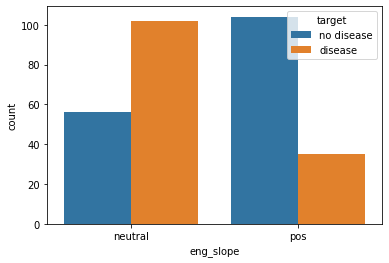

In [40]:
sns.countplot(x="eng_slope", hue="target", data=eng_df)
plt.show()

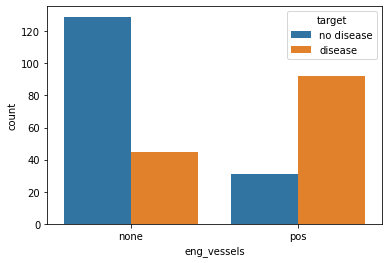

In [41]:
sns.countplot(x="eng_vessels", hue="target", data=eng_df)
plt.show()

It is likely that our ML algorithm would make some of these distinctions for us and we would not need to do some of these separations. I would like to feed it into something like a decision tree or random forest to see what identifiers the algorithm might find that I don't see.